In [49]:
# milestone3
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

# Load the training and test data
train_df = pd.read_csv('/kaggle/input/cse-517a-sp-2023-application-project-milestone-3/train.csv')
test_df = pd.read_csv('/kaggle/input/cse-517a-sp-2023-application-project-milestone-3/test.csv')

In [50]:
print(train_df.columns)

Index(['acc_rate', 'track', 'm', 'n', 'current_pitch', 'current_roll',
       'absoluate_roll', 'climb_delta', 'roll_rate_delta', 'climb_delta_diff',
       'time1', 'time2', 'time3', 'time4', 'time5', 'time6', 'time7', 'time8',
       'time9', 'time10', 'time11', 'time12', 'time13', 'time14',
       'time1_delta', 'time2_delta', 'time3_delta', 'time4_delta',
       'time5_delta', 'time6_delta', 'time7_delta', 'time8_delta',
       'time9_delta', 'time10_delta', 'time11_delta', 'time12_delta',
       'time13_delta', 'time14_delta', 'omega', 'set', 'target'],
      dtype='object')


In [51]:
print(test_df.columns)

Index(['Id', 'acc_rate', 'track', 'm', 'n', 'current_pitch', 'current_roll',
       'absoluate_roll', 'climb_delta', 'roll_rate_delta', 'climb_delta_diff',
       'time1', 'time2', 'time3', 'time4', 'time5', 'time6', 'time7', 'time8',
       'time9', 'time10', 'time11', 'time12', 'time13', 'time14',
       'time1_delta', 'time2_delta', 'time3_delta', 'time4_delta',
       'time5_delta', 'time6_delta', 'time7_delta', 'time8_delta',
       'time9_delta', 'time10_delta', 'time11_delta', 'time12_delta',
       'time13_delta', 'time14_delta', 'omega', 'set'],
      dtype='object')


# Data Preprocessing

<AxesSubplot:>

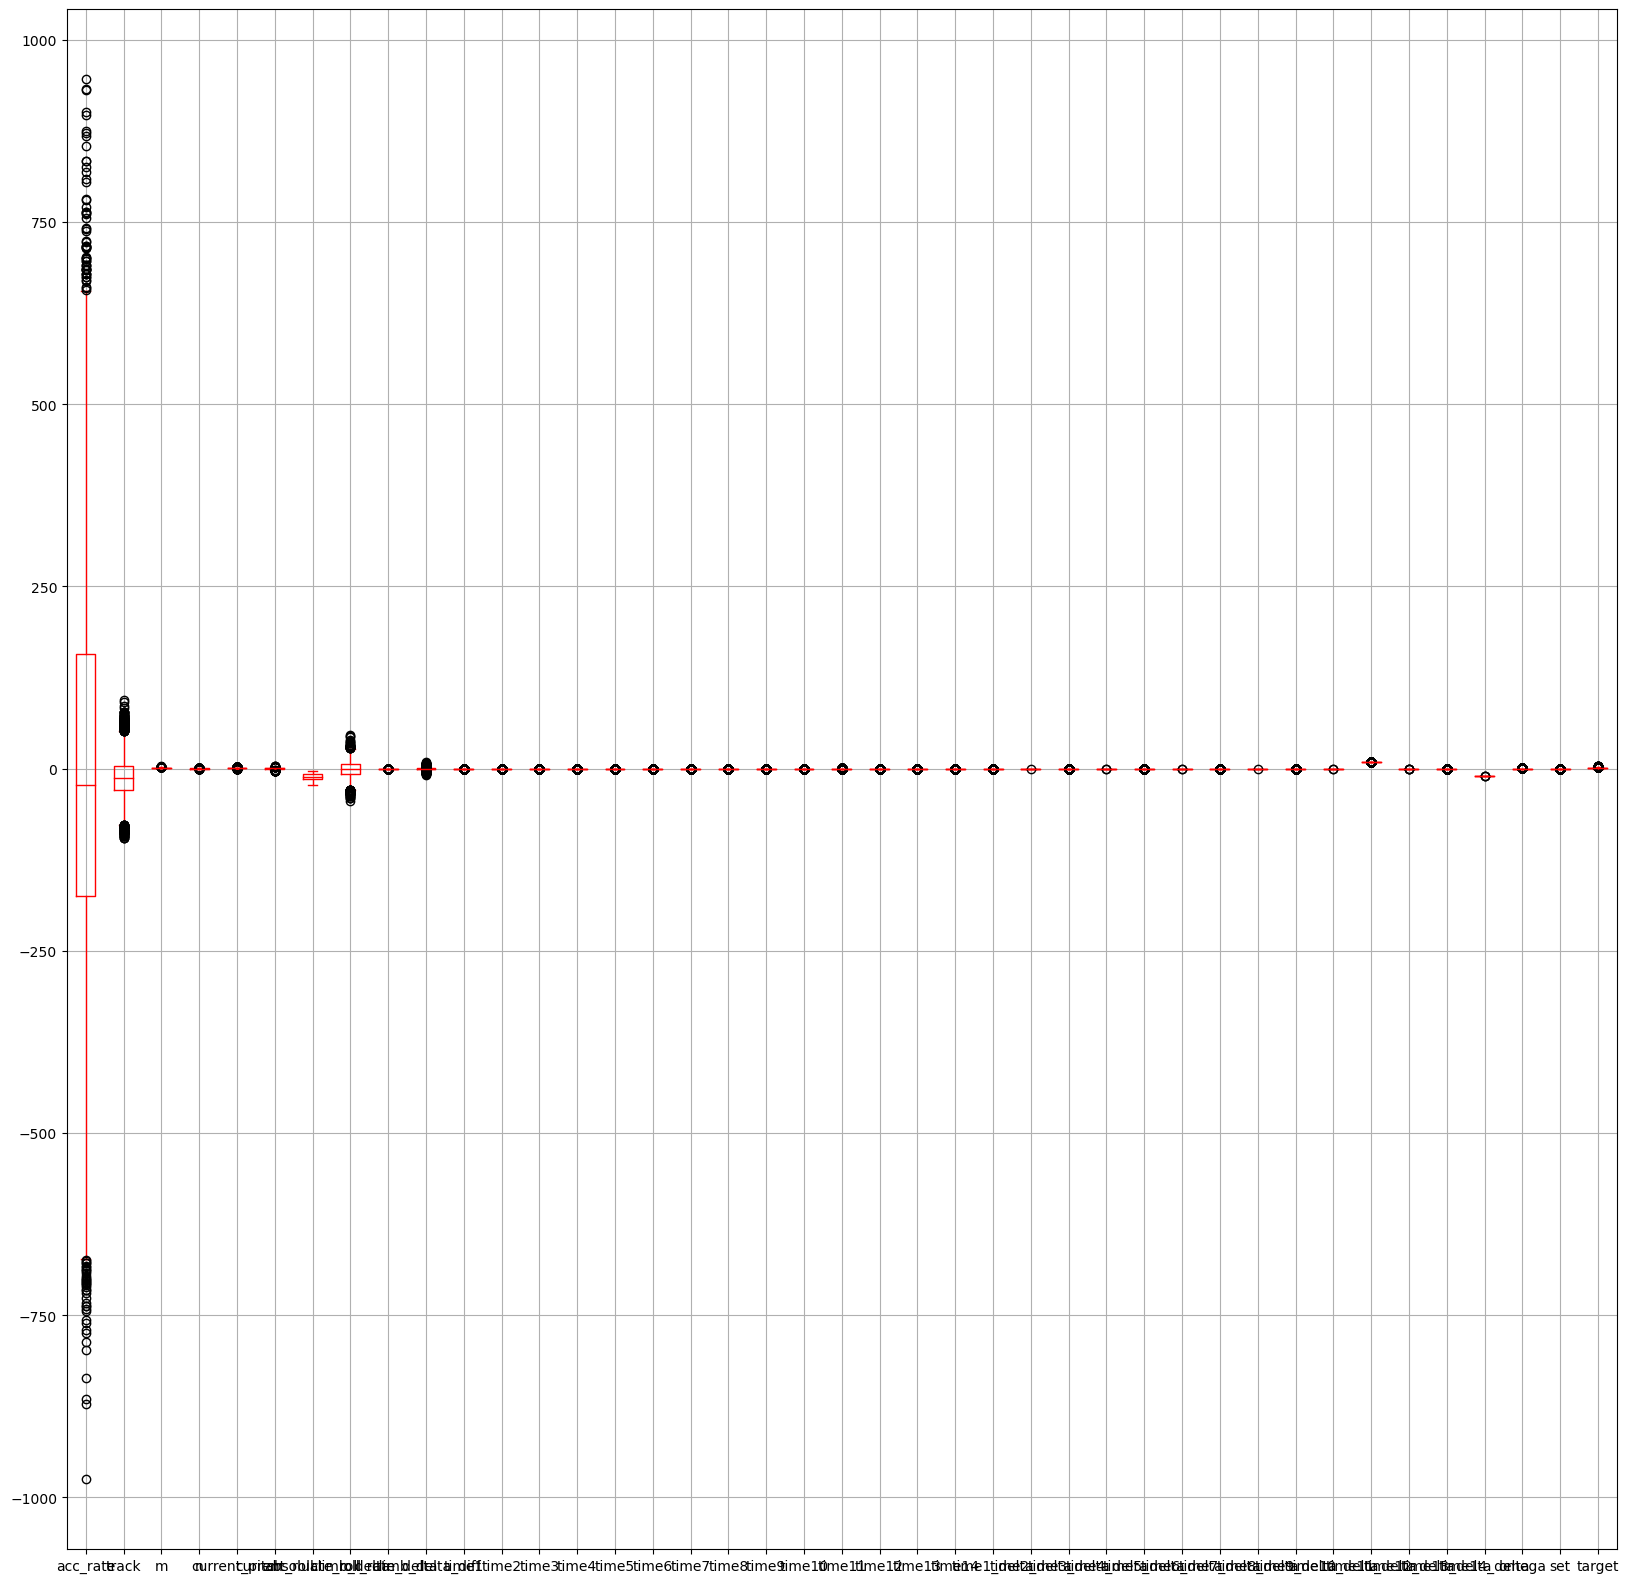

In [52]:
# Outliers
train_df.boxplot(figsize=(20, 20), color = 'red')

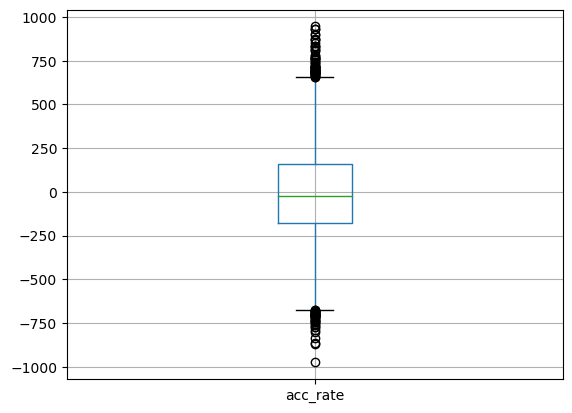

In [53]:
# Data Preprocessing
# Drop outliers
# acc_rate
boxplot = train_df.boxplot(column=['acc_rate'])
whiskers = boxplot.get_lines()[1:3]
lower_whisker = whiskers[0].get_ydata()[1]
upper_whisker = whiskers[1].get_ydata()[1]
outliers = train_df[(train_df['acc_rate'] < lower_whisker) | (train_df['acc_rate'] > upper_whisker)]
#print(outliers)
train_df = train_df[(train_df['acc_rate'] >= lower_whisker) & (train_df['acc_rate'] <= upper_whisker)]


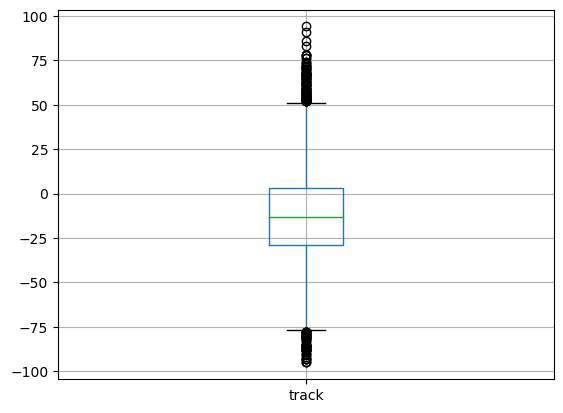

In [54]:
# track
boxplot = train_df.boxplot(column=['track'])
whiskers = boxplot.get_lines()[1:3]
lower_whisker = whiskers[0].get_ydata()[1]
upper_whisker = whiskers[1].get_ydata()[1]
outliers = train_df[(train_df['track'] < lower_whisker) | (train_df['track'] > upper_whisker)]
train_df = train_df[(train_df['track'] >= lower_whisker) & (train_df['track'] <= upper_whisker)]

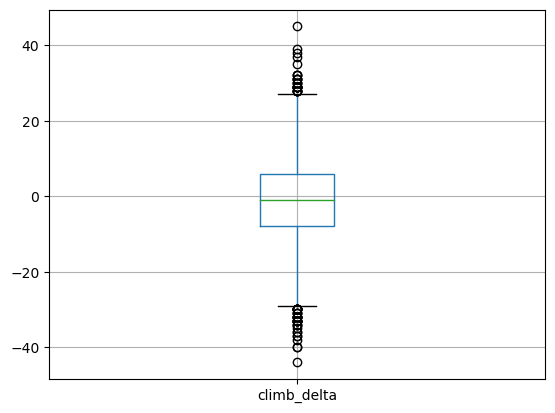

In [55]:
# climb_delta
boxplot = train_df.boxplot(column=['climb_delta'])
whiskers = boxplot.get_lines()[1:3]
lower_whisker = whiskers[0].get_ydata()[1]
upper_whisker = whiskers[1].get_ydata()[1]
outliers = train_df[(train_df['climb_delta'] < lower_whisker) | (train_df['climb_delta'] > upper_whisker)]
train_df = train_df[(train_df['climb_delta'] >= lower_whisker) & (train_df['climb_delta'] <= upper_whisker)]


<AxesSubplot:>

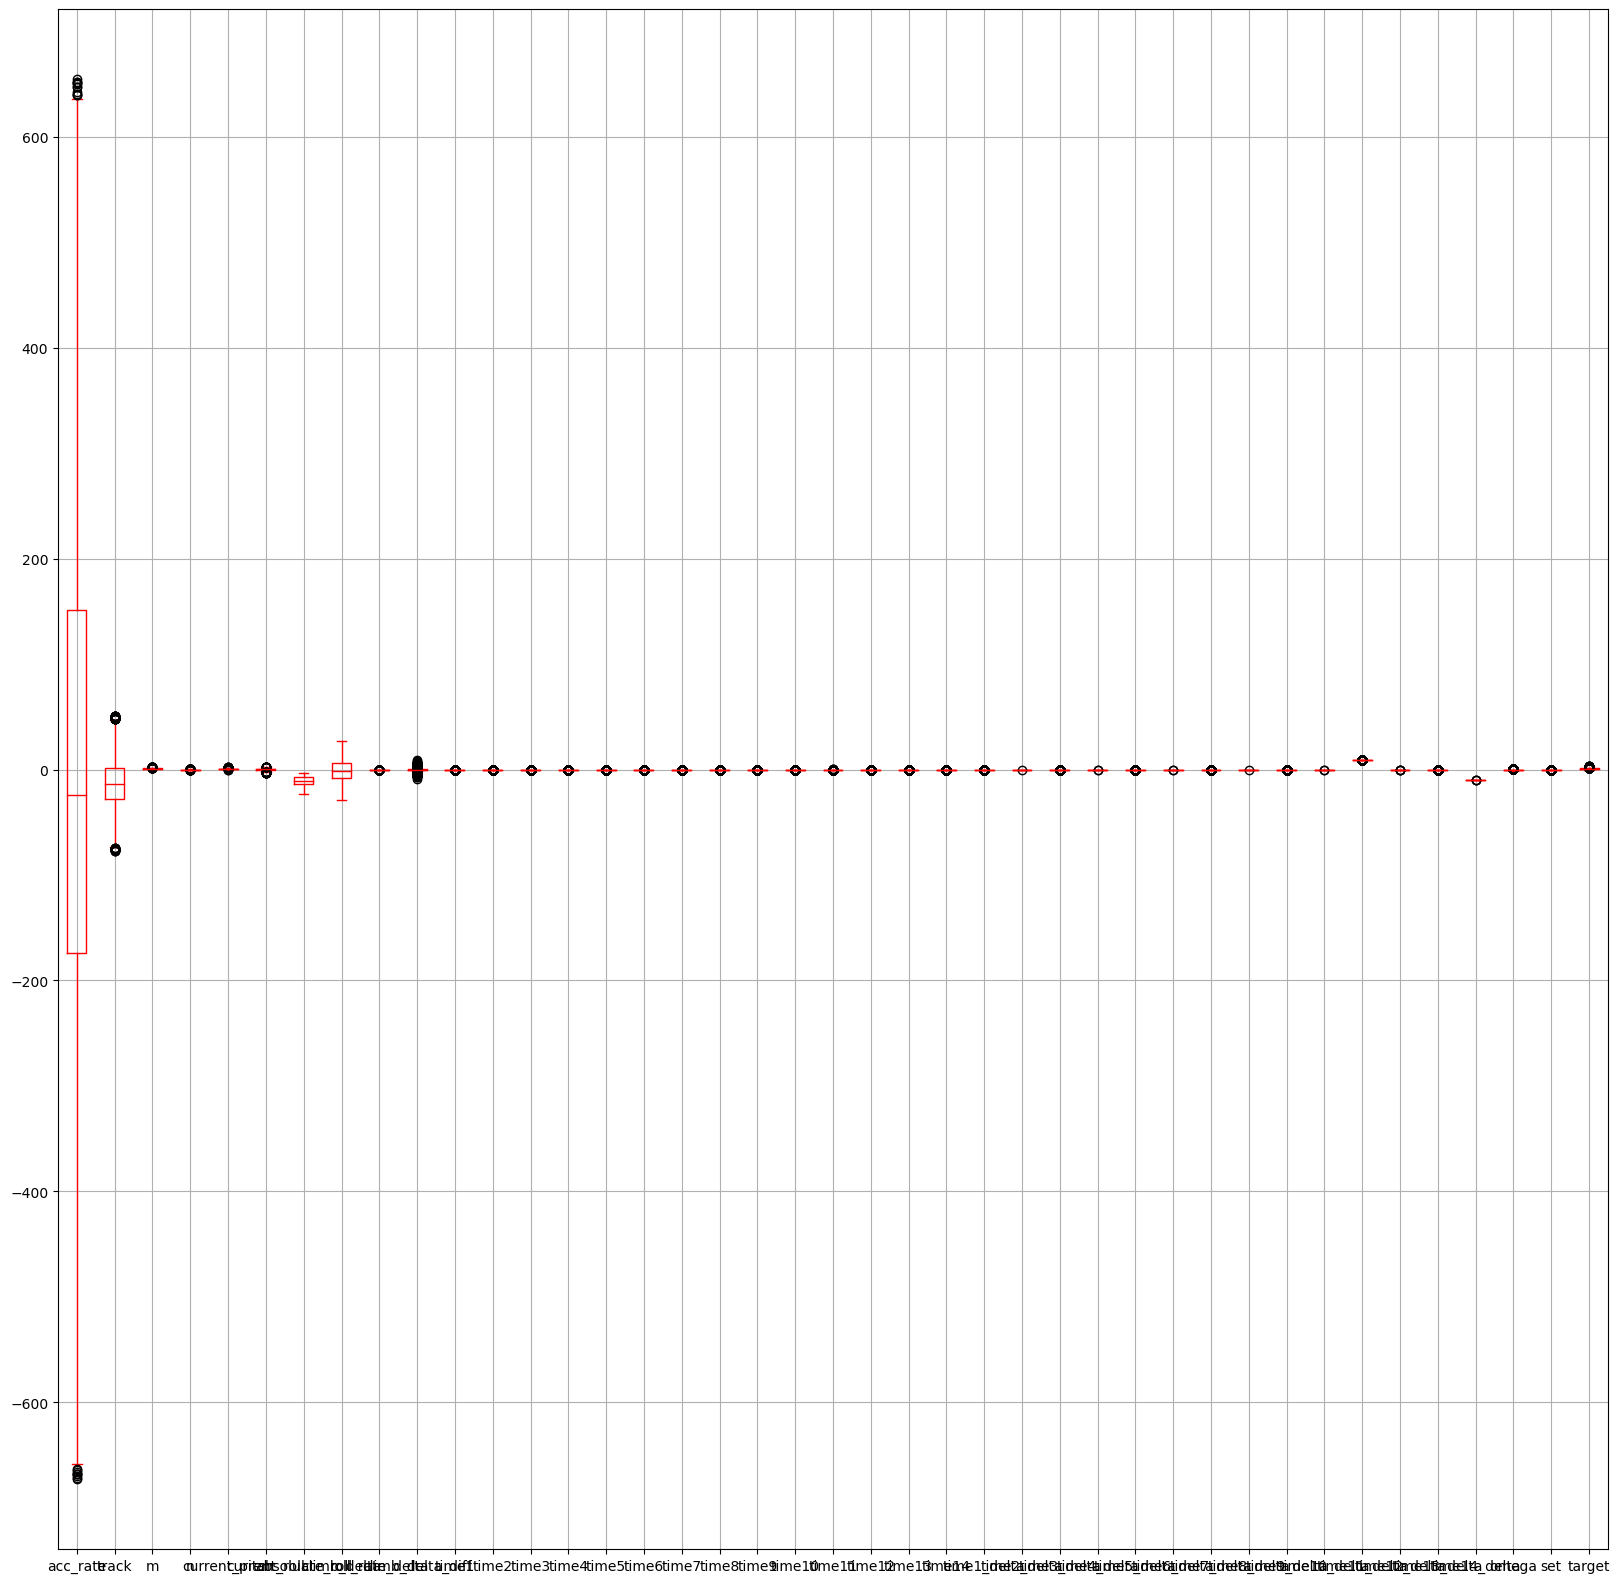

In [56]:
train_df.boxplot(figsize=(20, 20), color = 'red')

In [57]:
# Drop duplicated rows
duplicated_rows = train_df.duplicated()
train_df = train_df.drop_duplicates()

In [58]:
# Drop missing values
missing_values = train_df.isnull().sum()
print(missing_values)

acc_rate            0
track               0
m                   0
n                   0
current_pitch       0
current_roll        0
absoluate_roll      0
climb_delta         0
roll_rate_delta     0
climb_delta_diff    0
time1               0
time2               0
time3               0
time4               0
time5               0
time6               0
time7               0
time8               0
time9               0
time10              0
time11              0
time12              0
time13              0
time14              0
time1_delta         0
time2_delta         0
time3_delta         0
time4_delta         0
time5_delta         0
time6_delta         0
time7_delta         0
time8_delta         0
time9_delta         0
time10_delta        0
time11_delta        0
time12_delta        0
time13_delta        0
time14_delta        0
omega               0
set                 0
target              0
dtype: int64


In [59]:
print(train_df.columns)

Index(['acc_rate', 'track', 'm', 'n', 'current_pitch', 'current_roll',
       'absoluate_roll', 'climb_delta', 'roll_rate_delta', 'climb_delta_diff',
       'time1', 'time2', 'time3', 'time4', 'time5', 'time6', 'time7', 'time8',
       'time9', 'time10', 'time11', 'time12', 'time13', 'time14',
       'time1_delta', 'time2_delta', 'time3_delta', 'time4_delta',
       'time5_delta', 'time6_delta', 'time7_delta', 'time8_delta',
       'time9_delta', 'time10_delta', 'time11_delta', 'time12_delta',
       'time13_delta', 'time14_delta', 'omega', 'set', 'target'],
      dtype='object')


In [60]:
print(len(train_df))
print(len(test_df))

7926
5500


In [61]:
# Separate the target column from the training data
X_train = train_df.drop('target', axis=1)
y_train = train_df['target']

In [62]:
X_test = test_df.drop('Id', axis=1)

# Feature Engineering

# Feature selection

In [63]:
# Discard feature time2 and time3 from the training and test data
X_train = X_train.drop(['time2','time3'], axis=1)
X_test = X_test.drop(['time2','time3'], axis=1)

In [64]:
X_train.columns

Index(['acc_rate', 'track', 'm', 'n', 'current_pitch', 'current_roll',
       'absoluate_roll', 'climb_delta', 'roll_rate_delta', 'climb_delta_diff',
       'time1', 'time4', 'time5', 'time6', 'time7', 'time8', 'time9', 'time10',
       'time11', 'time12', 'time13', 'time14', 'time1_delta', 'time2_delta',
       'time3_delta', 'time4_delta', 'time5_delta', 'time6_delta',
       'time7_delta', 'time8_delta', 'time9_delta', 'time10_delta',
       'time11_delta', 'time12_delta', 'time13_delta', 'time14_delta', 'omega',
       'set'],
      dtype='object')

In [65]:
# Perform feature selection using SelectKBest
from sklearn.feature_selection import SelectKBest, f_regression
selector = SelectKBest(score_func=f_regression, k=30)
selector.fit(X_train, y_train)

# Get the selected features
selected_features = selector.get_support(indices=True)
print(X_train.columns[selected_features])
X_train = X_train.iloc[:, selected_features]
X_test = X_test.iloc[:, selected_features]


Index(['acc_rate', 'track', 'm', 'n', 'current_pitch', 'current_roll',
       'absoluate_roll', 'climb_delta', 'roll_rate_delta', 'climb_delta_diff',
       'time1', 'time4', 'time5', 'time6', 'time7', 'time8', 'time9', 'time10',
       'time11', 'time12', 'time13', 'time14', 'time1_delta', 'time7_delta',
       'time9_delta', 'time11_delta', 'time13_delta', 'time14_delta', 'omega',
       'set'],
      dtype='object')


In [66]:
# Remove low-variance features using VarianceThreshold
from sklearn.feature_selection import VarianceThreshold
selector = VarianceThreshold(threshold=0.00001)
selector.fit(X_train, y_train)

# Get the selected features
selected_features = selector.get_support(indices=True)
print(X_train.columns[selected_features])
X_train = X_train.iloc[:, selected_features]
X_test = X_test.iloc[:, selected_features]


Index(['acc_rate', 'track', 'm', 'n', 'current_pitch', 'current_roll',
       'absoluate_roll', 'climb_delta', 'roll_rate_delta', 'climb_delta_diff',
       'time1', 'time4', 'time5', 'time6', 'time7', 'time8', 'time9', 'time10',
       'time11', 'time12', 'time13', 'time14', 'omega', 'set'],
      dtype='object')


# Standardization & PCA

In [67]:
# Standardization
# Define the scaler object and fit it to the training data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)

# Apply the same feature scaling to the test data
X_test = scaler.transform(X_test)

In [68]:
# Perform PCA on the training data
from sklearn.decomposition import PCA
pca = PCA(n_components=11)
X_train = pca.fit_transform(X_train)

# Reduce the dimensionality of the test data using the same PCA
X_test = pca.transform(X_test)


# Hyperparameters Optimization & Model Training

In [69]:
# Split the data into training and validation sets
from sklearn.model_selection import GridSearchCV, train_test_split
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.05, random_state=77)

 The hyperparameters optimization of the Gaussian process regressor is slow, so I commented out the code of the hyperparameters optimization process after finding the best hyperparameters and directly used these hyperparameters in the following code.

In [70]:
# Optimize the hyperparameters using GridSearch
# Gaussian Process Regressor
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, WhiteKernel
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
from math import sqrt
import numpy as np
'''
# Define the kernel hyperparameters to search over
param_grid = {'kernel': [RBF(length_scale=1.0), RBF(length_scale=10.0)],
              'alpha': [0.1, 1.0, 10.0],
              'random_state': [86]}

# Create a Gaussian process regressor object
gpr = GaussianProcessRegressor()

# Create a GridSearchCV object with the specified parameters
grid_search = GridSearchCV(gpr, param_grid, cv=5, scoring='neg_mean_squared_error')

# Fit the GridSearchCV object to the training data
grid_search.fit(X_train, y_train)

# Get the best hyperparameters and score
best_params = grid_search.best_params_
best_rmse = np.sqrt(-grid_search.best_score_)
print('Best hyperparameters:', best_params)
print('Best RMSE:', best_rmse)
'''

"\n# Define the kernel hyperparameters to search over\nparam_grid = {'kernel': [RBF(length_scale=1.0), RBF(length_scale=10.0)],\n              'alpha': [0.1, 1.0, 10.0],\n              'random_state': [86]}\n\n# Create a Gaussian process regressor object\ngpr = GaussianProcessRegressor()\n\n# Create a GridSearchCV object with the specified parameters\ngrid_search = GridSearchCV(gpr, param_grid, cv=5, scoring='neg_mean_squared_error')\n\n# Fit the GridSearchCV object to the training data\ngrid_search.fit(X_train, y_train)\n\n# Get the best hyperparameters and score\nbest_params = grid_search.best_params_\nbest_rmse = np.sqrt(-grid_search.best_score_)\nprint('Best hyperparameters:', best_params)\nprint('Best RMSE:', best_rmse)\n"

Best hyperparameters: {'alpha': 0.1, 'kernel': RBF(length_scale=10), 'random_state': [86]} 

In [71]:
# Make predictions on the validation data using the best hyperparameters
gpr_best = GaussianProcessRegressor(alpha= 0.1, kernel = RBF(length_scale=10.0), random_state = 86)
gpr_best.fit(X_train, y_train)

# Make predictions on the validation data
y_pred = gpr_best.predict(X_val)
# y_pred = np.round(y_pred, decimals=1)
val_rmse = np.sqrt(mean_squared_error(y_val, y_pred))
print('Validation RMSE:', val_rmse)


Validation RMSE: 0.15360991057575307


In [72]:
# Make prediction on test data
y_pred1 = gpr_best.predict(X_test)
# y_pred1 = np.round(y_pred1, decimals=1)

# Create the submission DataFrame
submission_df1 = pd.DataFrame({'Id': test_df['Id'], 'target': y_pred1})

# Save the submission DataFrame to a CSV file
submission_df1.to_csv('submission.csv', index=False)

Try different models like knn, random forest and LightGBM

In [73]:
#knn
from sklearn.neighbors import KNeighborsRegressor


# Define the KNN model
knn = KNeighborsRegressor()

# Define the grid of hyperparameters to explore
param_grid = {'n_neighbors': [3, 5, 7, 9],
              'weights': ['uniform', 'distance'],
              'p': [1, 2]}

# Perform grid search with cross-validation using the RMSE scorer
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Print the best hyperparameters and score
best_params = grid_search.best_params_
best_rmse = np.sqrt(-grid_search.best_score_)
print('Best hyperparameters:', best_params)
print('Best RMSE:', best_rmse)



Best hyperparameters: {'n_neighbors': 9, 'p': 2, 'weights': 'distance'}
Best RMSE: 0.19159612187716393


Best hyperparameters: {'n_neighbors': 9, 'p': 2, 'weights': 'distance'}
Best RMSE: 0.1933182703302749

In [74]:
import numpy as np
from sklearn.metrics import mean_squared_error

# Train the KNN model with the best hyperparameters
best_knn = KNeighborsRegressor(n_neighbors = 9, p = 2, weights = 'distance')
best_knn.fit(X_train, y_train)

# Obtain the RMSE on the validation data
y_pred = best_knn.predict(X_val)
val_rmse = np.sqrt(mean_squared_error(y_val, y_pred))
print('Validation RMSE:', val_rmse)


Validation RMSE: 0.18562716912058447


In [75]:
'''
# Make prediction on test data
y_pred1 = best_knn.predict(X_test)
y_pred1 = np.round(y_pred1, decimals=1)

# Create the submission DataFrame 
submission_df = pd.DataFrame({'Id': test_df['Id'], 'target': y_pred1})

# Save the submission DataFrame to a CSV file
submission_df.to_csv('submission1.csv', index=False)
'''

"\n# Make prediction on test data\ny_pred1 = best_knn.predict(X_test)\ny_pred1 = np.round(y_pred1, decimals=1)\n\n# Create the submission DataFrame \nsubmission_df = pd.DataFrame({'Id': test_df['Id'], 'target': y_pred1})\n\n# Save the submission DataFrame to a CSV file\nsubmission_df.to_csv('submission1.csv', index=False)\n"

In [76]:
# Random Forest
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
import numpy as np
'''
# Define the hyperparameters to search over
param_grid = {'n_estimators': [100, 200],
              'max_depth': [5, 10],
              'min_samples_split': [2, 5, 10],
              'min_samples_leaf': [1, 2, 4]}

# Create a random forest regressor object
rf = RandomForestRegressor()

# Create a GridSearchCV object with the specified parameters
grid_search = GridSearchCV(rf, param_grid, cv=5, scoring='neg_mean_squared_error')

# Fit the GridSearchCV object to the training data
grid_search.fit(X_train, y_train)

# Get the best hyperparameters and score
best_params = grid_search.best_params_
best_rmse = np.sqrt(-grid_search.best_score_)
print('Best hyperparameters:', best_params)
print('Best RMSE:', best_rmse)
'''

"\n# Define the hyperparameters to search over\nparam_grid = {'n_estimators': [100, 200],\n              'max_depth': [5, 10],\n              'min_samples_split': [2, 5, 10],\n              'min_samples_leaf': [1, 2, 4]}\n\n# Create a random forest regressor object\nrf = RandomForestRegressor()\n\n# Create a GridSearchCV object with the specified parameters\ngrid_search = GridSearchCV(rf, param_grid, cv=5, scoring='neg_mean_squared_error')\n\n# Fit the GridSearchCV object to the training data\ngrid_search.fit(X_train, y_train)\n\n# Get the best hyperparameters and score\nbest_params = grid_search.best_params_\nbest_rmse = np.sqrt(-grid_search.best_score_)\nprint('Best hyperparameters:', best_params)\nprint('Best RMSE:', best_rmse)\n"

Best hyperparameters: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 100} 

In [77]:
# Make predictions on the validation data using the best hyperparameters
rf_best = RandomForestRegressor(max_depth = 10, min_samples_leaf = 4, min_samples_split = 2, n_estimators = 100)
rf_best.fit(X_train, y_train)
y_pred = rf_best.predict(X_val)
val_rmse = np.sqrt(mean_squared_error(y_val, y_pred))

print('Validation RMSE:', val_rmse)

Validation RMSE: 0.1765060438181095


In [78]:
'''
# Make prediction on test data
y_pred1 = rf_best.predict(X_test)

# Create the submission DataFrame
submission_df = pd.DataFrame({'Id': test_df['Id'], 'target': y_pred1})

# Save the submission DataFrame to a CSV file
submission_df.to_csv('submission2.csv', index=False)
'''

"\n# Make prediction on test data\ny_pred1 = rf_best.predict(X_test)\n\n# Create the submission DataFrame\nsubmission_df = pd.DataFrame({'Id': test_df['Id'], 'target': y_pred1})\n\n# Save the submission DataFrame to a CSV file\nsubmission_df.to_csv('submission2.csv', index=False)\n"

In [79]:
# LightGBM
import lightgbm as lgb
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
import numpy as np
'''
# Define the hyperparameters to search over
param_grid = {
    'num_leaves': [20, 30, 40],
    'max_depth': [-1, 5, 10],
    'learning_rate': [0.01, 0.05, 0.1],
    'n_estimators': [100, 200, 300],
    'objective': ['regression'],
}

# Create a LightGBM regressor object
lgbm = lgb.LGBMRegressor()

# Create a GridSearchCV object and fit it to the data
grid_search = GridSearchCV(lgbm, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Get the best hyperparameters and score
best_params = grid_search.best_params_
best_rmse = np.sqrt(-grid_search.best_score_)
print('Best hyperparameters:', best_params)
print('Best RMSE:', best_rmse)
'''

"\n# Define the hyperparameters to search over\nparam_grid = {\n    'num_leaves': [20, 30, 40],\n    'max_depth': [-1, 5, 10],\n    'learning_rate': [0.01, 0.05, 0.1],\n    'n_estimators': [100, 200, 300],\n    'objective': ['regression'],\n}\n\n# Create a LightGBM regressor object\nlgbm = lgb.LGBMRegressor()\n\n# Create a GridSearchCV object and fit it to the data\ngrid_search = GridSearchCV(lgbm, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')\ngrid_search.fit(X_train, y_train)\n\n# Get the best hyperparameters and score\nbest_params = grid_search.best_params_\nbest_rmse = np.sqrt(-grid_search.best_score_)\nprint('Best hyperparameters:', best_params)\nprint('Best RMSE:', best_rmse)\n"

Best hyperparameters: {'learning_rate': 0.05, 'max_depth': 10, 'n_estimators': 300, 'num_leaves': 20, 'objective': 'regression'}
Best RMSE: 0.17199167764140583

In [80]:
# LightGBM
import lightgbm as lgb
# Make predictions on the validation data
lgbm_best = lgb.LGBMRegressor(learning_rate = 0.05, max_depth = 10, n_estimators = 300, num_leaves = 20, objective = 'regression')
lgbm_best.fit(X_train, y_train)
y_pred = lgbm_best.predict(X_val)
val_rmse = np.sqrt(mean_squared_error(y_val, y_pred))

print('Validation RMSE:', val_rmse)

Validation RMSE: 0.1589557150214112


In [81]:
'''
# Make prediction on test data
y_pred1 = lgbm_best.predict(X_test)
# y_pred1 = np.round(y_pred1, decimals=1)

# Create the submission DataFrame
submission_df1 = pd.DataFrame({'Id': test_df['Id'], 'target': y_pred1})

# Save the submission DataFrame to a CSV file
submission_df1.to_csv('submission.csv', index=False)
'''

"\n# Make prediction on test data\ny_pred1 = lgbm_best.predict(X_test)\n# y_pred1 = np.round(y_pred1, decimals=1)\n\n# Create the submission DataFrame\nsubmission_df1 = pd.DataFrame({'Id': test_df['Id'], 'target': y_pred1})\n\n# Save the submission DataFrame to a CSV file\nsubmission_df1.to_csv('submission.csv', index=False)\n"

In [82]:
#submission = pd.read_csv('/kaggle/working/submission.csv')
#submission.head()

,Id,target
0,1,1.668133
1,2,0.492576
2,3,0.614611
3,4,0.625704
4,5,1.337666
